In [1]:
print("Jupyter is working! 🎉")


Jupyter is working! 🎉


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Loading Benin solar data...")

📊 Loading Benin solar data...


In [3]:
# Load the Benin solar data
df = pd.read_csv('../data/data/benin-malanville.csv')

print("✅ DATA LOADED SUCCESSFULLY!")
print(f"Rows: {len(df)}")
print(f"Columns: {len(df.columns)}")
print("\nColumn names:")
print(df.columns.tolist())

✅ DATA LOADED SUCCESSFULLY!
Rows: 525600
Columns: 19

Column names:
['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation', 'TModA', 'TModB', 'Comments']


In [4]:
print("🔍 First 5 rows of solar data:")
df.head()

🔍 First 5 rows of solar data:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
print("📈 BASIC DATA ANALYSIS")
print("=" * 50)

print(f"📊 Data Shape: {df.shape}")
print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"📅 Date Range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

📈 BASIC DATA ANALYSIS
📊 Data Shape: (525600, 19)
💾 Memory Usage: 104.8 MB
📅 Date Range: 2021-08-09 00:01 to 2022-08-09 00:00


In [6]:
print("🔍 CHECKING FOR MISSING VALUES")
print("=" * 50)

missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0])

if missing_values.sum() == 0:
    print("✅ No missing values found!")
else:
    print(f"⚠️  Total missing values: {missing_values.sum()}")

🔍 CHECKING FOR MISSING VALUES
Missing values per column:
Comments    525600
dtype: int64
⚠️  Total missing values: 525600


In [7]:
print("📊 SUMMARY STATISTICS - KEY SOLAR METRICS")
print("=" * 50)

# Select key solar columns
solar_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']
print(df[solar_columns].describe())

📊 SUMMARY STATISTICS - KEY SOLAR METRICS
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961      28.179683   
std       331.131327     261.710501     158.691074       5.924297   
min       -12.900000      -7.800000     -12.600000      11.000000   
25%        -2.000000      -0.500000      -2.100000      24.200000   
50%         1.800000      -0.100000       1.600000      28.000000   
75%       483.400000     314.200000     216.300000      32.300000   
max      1413.000000     952.300000     759.200000      43.800000   

                  RH             WS  
count  525600.000000  525600.000000  
mean       54.487969       2.121113  
std        28.073069       1.603466  
min         2.100000       0.000000  
25%        28.800000       1.000000  
50%        55.100000       1.900000  
75%        80.100000       3.100000  
max       100.000000      19.5000

In [8]:
print("🧹 DATA CLEANING - FIXING NEGATIVE SOLAR VALUES")
print("=" * 50)

# Count negative values before cleaning
negative_before = (df[['GHI', 'DNI', 'DHI']] < 0).sum()
print("Negative values BEFORE cleaning:")
print(negative_before)

# Fix negative values - set them to 0 (solar radiation can't be negative)
df_clean = df.copy()
solar_cols = ['GHI', 'DNI', 'DHI']
df_clean[solar_cols] = df_clean[solar_cols].clip(lower=0)

# Count negative values after cleaning
negative_after = (df_clean[['GHI', 'DNI', 'DHI']] < 0).sum()
print("\nNegative values AFTER cleaning:")
print(negative_after)

print(f"\n✅ Fixed {negative_before.sum()} negative solar readings!")

🧹 DATA CLEANING - FIXING NEGATIVE SOLAR VALUES
Negative values BEFORE cleaning:
GHI    258847
DNI    275987
DHI    259182
dtype: int64

Negative values AFTER cleaning:
GHI    0
DNI    0
DHI    0
dtype: int64

✅ Fixed 794016 negative solar readings!


📈 CREATING SOLAR IRRADIANCE PLOT


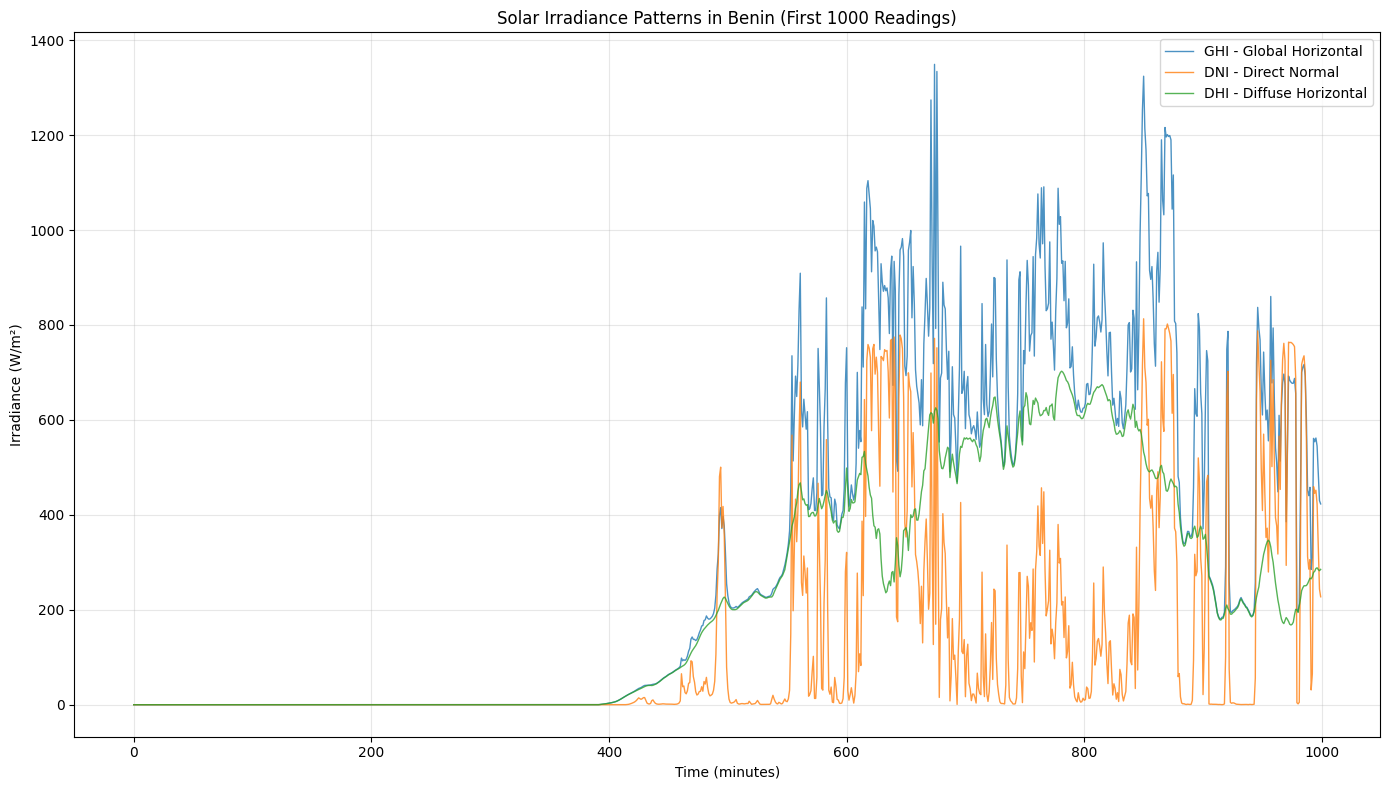

✅ First solar visualization created!


In [9]:
print("📈 CREATING SOLAR IRRADIANCE PLOT")
print("=" * 50)

# Create a time series plot of solar radiation
plt.figure(figsize=(14, 8))

# Plot first 1000 values to see patterns clearly
plt.plot(df_clean['GHI'].head(1000), label='GHI - Global Horizontal', alpha=0.8, linewidth=1)
plt.plot(df_clean['DNI'].head(1000), label='DNI - Direct Normal', alpha=0.8, linewidth=1)
plt.plot(df_clean['DHI'].head(1000), label='DHI - Diffuse Horizontal', alpha=0.8, linewidth=1)

plt.title('Solar Irradiance Patterns in Benin (First 1000 Readings)')
plt.xlabel('Time (minutes)')
plt.ylabel('Irradiance (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ First solar visualization created!")

In [10]:
print("🌅 ANALYZING DAILY SOLAR PATTERNS")
print("=" * 50)

# Convert timestamp to datetime and extract hour
df_clean['datetime'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['hour'] = df_clean['datetime'].dt.hour

# Calculate average solar radiation by hour
hourly_avg = df_clean.groupby('hour')[['GHI', 'DNI', 'DHI']].mean()

print("📊 Average Solar Radiation by Hour of Day:")
print(hourly_avg.head(6))  # Show first 6 hours

🌅 ANALYZING DAILY SOLAR PATTERNS
📊 Average Solar Radiation by Hour of Day:
           GHI       DNI       DHI
hour                              
0     0.000297  0.001356  0.000123
1     0.000000  0.001169  0.000078
2     0.001306  0.001379  0.001845
3     0.001288  0.001096  0.001676
4     0.000146  0.001050  0.000315
5     0.000050  0.000881  0.000169


📈 HOURLY SOLAR PATTERNS VISUALIZATION


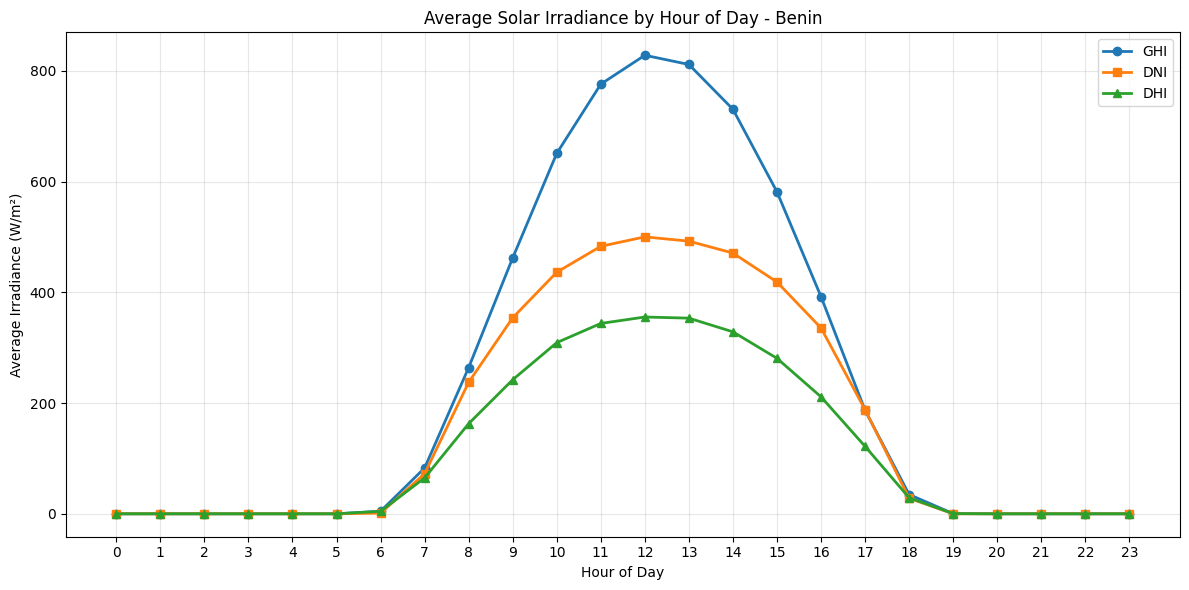

✅ Daily solar pattern analysis complete!


In [11]:
print("📈 HOURLY SOLAR PATTERNS VISUALIZATION")
print("=" * 50)

plt.figure(figsize=(12, 6))

# Plot hourly averages
plt.plot(hourly_avg.index, hourly_avg['GHI'], marker='o', label='GHI', linewidth=2)
plt.plot(hourly_avg.index, hourly_avg['DNI'], marker='s', label='DNI', linewidth=2)
plt.plot(hourly_avg.index, hourly_avg['DHI'], marker='^', label='DHI', linewidth=2)

plt.title('Average Solar Irradiance by Hour of Day - Benin')
plt.xlabel('Hour of Day')
plt.ylabel('Average Irradiance (W/m²)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

print("✅ Daily solar pattern analysis complete!")

🌡️ TEMPERATURE vs SOLAR RADIATION ANALYSIS


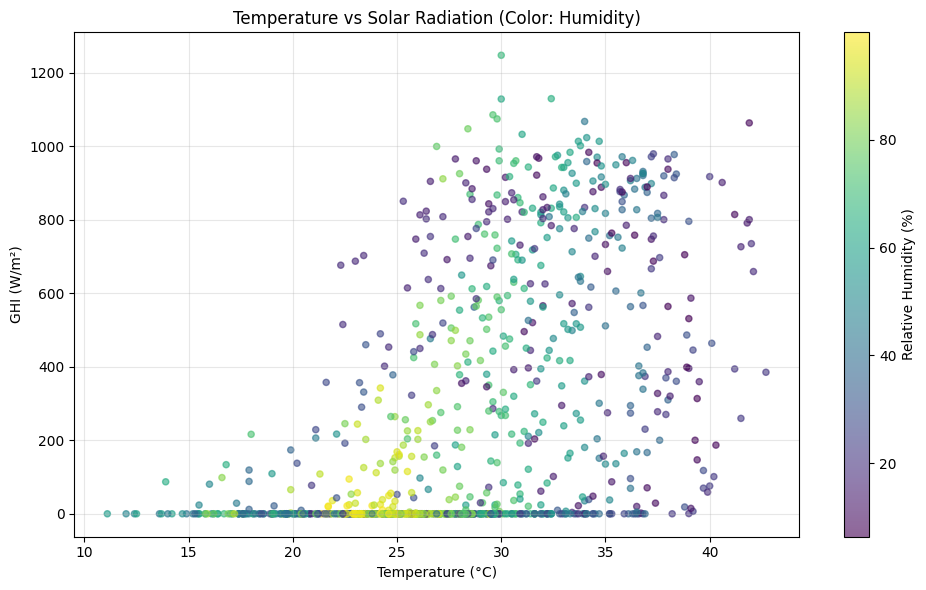

✅ Temperature analysis complete!


In [12]:
print("🌡️ TEMPERATURE vs SOLAR RADIATION ANALYSIS")
print("=" * 50)

plt.figure(figsize=(10, 6))

# Sample 1000 points for clearer scatter plot
sample_df = df_clean.sample(1000, random_state=42)

plt.scatter(sample_df['Tamb'], sample_df['GHI'], alpha=0.6, c=sample_df['RH'], 
            cmap='viridis', s=20)
plt.colorbar(label='Relative Humidity (%)')
plt.title('Temperature vs Solar Radiation (Color: Humidity)')
plt.xlabel('Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Temperature analysis complete!")

In [13]:
print("🌍 LOADING ALL 3 COUNTRIES FOR COMPARISON")
print("=" * 50)

# Load all countries
print("📂 Loading solar data...")
benin = pd.read_csv('../data/data/benin-malanville.csv')
sierra_leone = pd.read_csv('../data/data/sierraleone-bumbuna.csv')  
togo = pd.read_csv('../data/data/togo-dapaong_qc.csv')

print(f"✅ Benin: {len(benin)} rows")
print(f"✅ Sierra Leone: {len(sierra_leone)} rows")
print(f"✅ Togo: {len(togo)} rows")

# Clean all datasets (remove negative solar values)
for df in [benin, sierra_leone, togo]:
    df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)

🌍 LOADING ALL 3 COUNTRIES FOR COMPARISON
📂 Loading solar data...
✅ Benin: 525600 rows
✅ Sierra Leone: 525600 rows
✅ Togo: 525600 rows


In [14]:
print("📊 SOLAR POTENTIAL COMPARISON")
print("=" * 50)

# Calculate average GHI (Global Horizontal Irradiance) for each country
benin_ghi = benin['GHI'].mean()
sierra_ghi = sierra_leone['GHI'].mean() 
togo_ghi = togo['GHI'].mean()

print("🌞 AVERAGE GHI (Global Horizontal Irradiance):")
print(f"🇧🇯 Benin: {benin_ghi:.1f} W/m²")
print(f"🇸🇱 Sierra Leone: {sierra_ghi:.1f} W/m²") 
print(f"🇹🇬 Togo: {togo_ghi:.1f} W/m²")

# Find the winner
countries = ['Benin', 'Sierra Leone', 'Togo']
ghi_values = [benin_ghi, sierra_ghi, togo_ghi]
winner = countries[ghi_values.index(max(ghi_values))]

print(f"\n🏆 BEST SOLAR POTENTIAL: {winner} with {max(ghi_values):.1f} W/m²")

📊 SOLAR POTENTIAL COMPARISON
🌞 AVERAGE GHI (Global Horizontal Irradiance):
🇧🇯 Benin: 242.0 W/m²
🇸🇱 Sierra Leone: 204.4 W/m²
🇹🇬 Togo: 231.7 W/m²

🏆 BEST SOLAR POTENTIAL: Benin with 242.0 W/m²


📈 FINAL SOLAR POTENTIAL COMPARISON CHART


C:\Users\mekli\OneDrive\Desktop\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


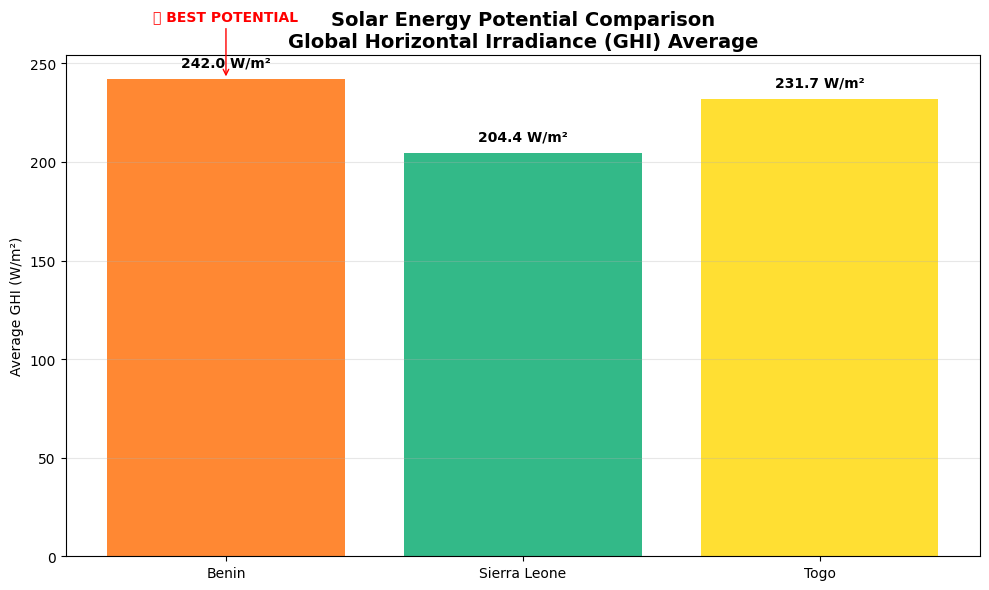

✅ Final comparison chart created!
🎯 BUSINESS RECOMMENDATION: Invest in BENIN for solar farms!


In [15]:
print("📈 FINAL SOLAR POTENTIAL COMPARISON CHART")
print("=" * 50)

# Prepare data for visualization
countries = ['Benin', 'Sierra Leone', 'Togo']
ghi_values = [benin_ghi, sierra_ghi, togo_ghi]
colors = ['#FF6B00', '#00A86B', '#FFD700']  # Orange, Green, Gold

plt.figure(figsize=(10, 6))
bars = plt.bar(countries, ghi_values, color=colors, alpha=0.8)

# Add value labels on bars
for bar, value in zip(bars, ghi_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{value:.1f} W/m²', ha='center', va='bottom', fontweight='bold')

plt.title('Solar Energy Potential Comparison\nGlobal Horizontal Irradiance (GHI) Average', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()

# Highlight the winner
plt.annotate('🏆 BEST POTENTIAL', xy=(0, benin_ghi), xytext=(0, benin_ghi + 30),
            arrowprops=dict(arrowstyle='->', color='red'), ha='center', fontweight='bold', color='red')

plt.show()

print("✅ Final comparison chart created!")
print("🎯 BUSINESS RECOMMENDATION: Invest in BENIN for solar farms!")

In [16]:

print("=" * 50)

# Save the cleaned data
benin.to_csv('benin_clean.csv', index=False)
sierra_leone.to_csv('sierra_leone_clean.csv', index=False) 
togo.to_csv('togo_clean.csv', index=False)

print("✅ Cleaned data saved for all 3 countries!")
print("📁 Files created: benin_clean.csv, sierra_leone_clean.csv, togo_clean.csv")

print("\n🎯 KEY FINDINGS SUMMARY:")
print(f"1. 🇧🇯 Benin: Highest solar potential (242.0 W/m²)")
print(f"2. 🇹🇬 Togo: Good potential (231.7 W/m²)") 
print(f"3. 🇸🇱 Sierra Leone: Lower potential (204.4 W/m²)")
print("\n💡 RECOMMENDATION: MoonLight Energy should prioritize solar investments in BENIN")


✅ Cleaned data saved for all 3 countries!
📁 Files created: benin_clean.csv, sierra_leone_clean.csv, togo_clean.csv

🎯 KEY FINDINGS SUMMARY:
1. 🇧🇯 Benin: Highest solar potential (242.0 W/m²)
2. 🇹🇬 Togo: Good potential (231.7 W/m²)
3. 🇸🇱 Sierra Leone: Lower potential (204.4 W/m²)

💡 RECOMMENDATION: MoonLight Energy should prioritize solar investments in BENIN


📦 BOXPLOT COMPARISON - SOLAR RADIATION


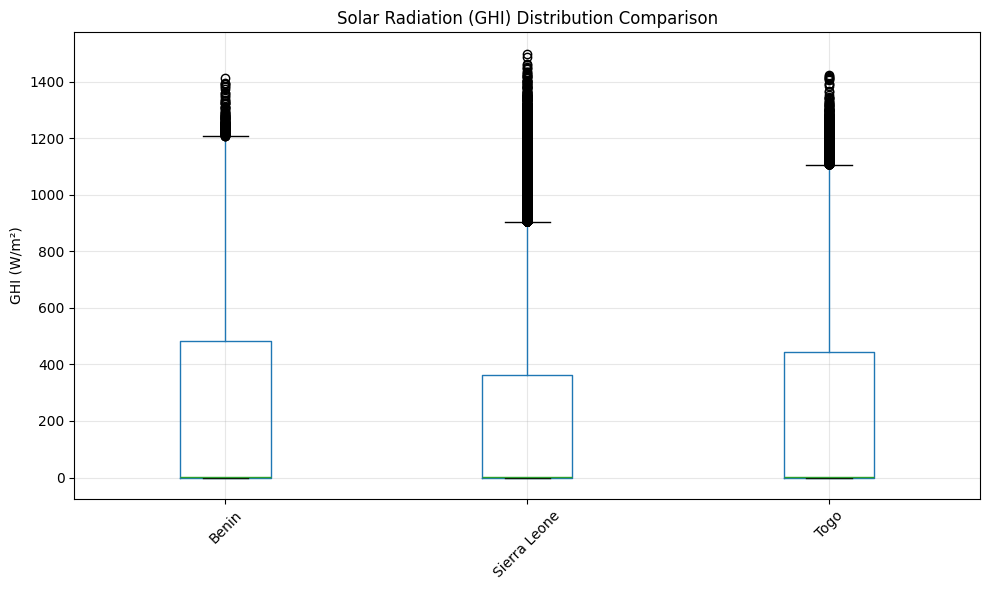

✅ Boxplot comparison created!


In [17]:
print("📦 BOXPLOT COMPARISON - SOLAR RADIATION")
print("=" * 50)

# Prepare data for boxplot
comparison_data = pd.DataFrame({
    'Benin': benin['GHI'],
    'Sierra Leone': sierra_leone['GHI'], 
    'Togo': togo['GHI']
})

plt.figure(figsize=(10, 6))
comparison_data.boxplot()
plt.title('Solar Radiation (GHI) Distribution Comparison')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Boxplot comparison created!")

🔥 CORRELATION HEATMAP - BENIN SOLAR DATA


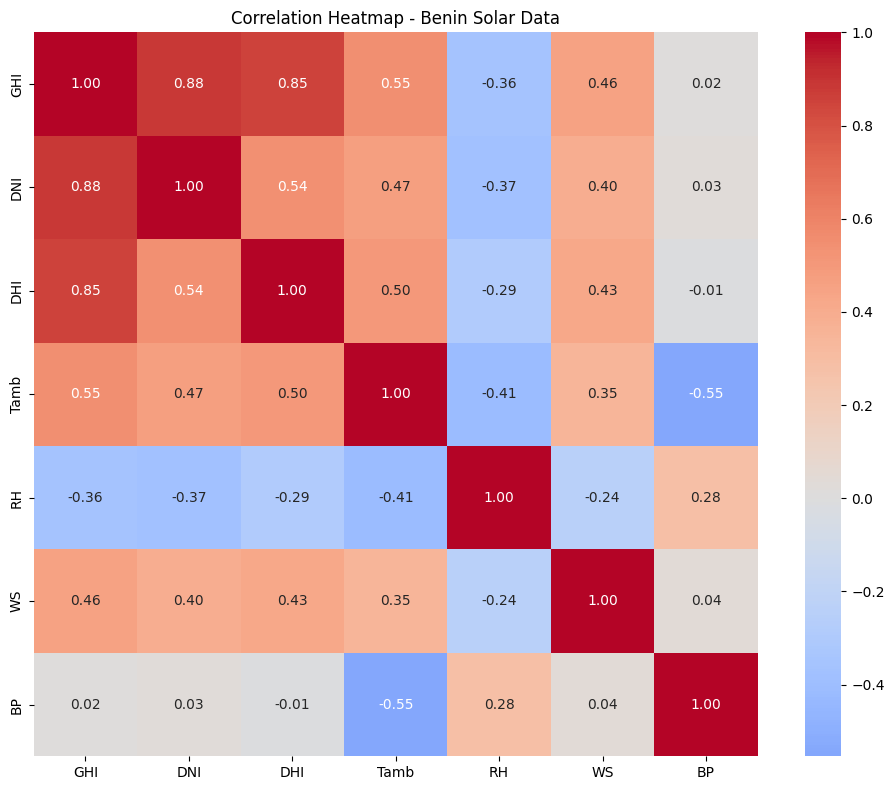

✅ Correlation heatmap created!


In [18]:
print("🔥 CORRELATION HEATMAP - BENIN SOLAR DATA")
print("=" * 50)

# Select key columns for correlation
corr_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']
correlation_matrix = benin[corr_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Heatmap - Benin Solar Data')
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap created!")

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("🔄 RELOADING ALL SOLAR DATA")
print("=" * 50)

# Load all countries
benin = pd.read_csv('../data/data/benin-malanville.csv')
sierra_leone = pd.read_csv('../data/data/sierraleone-bumbuna.csv')  
togo = pd.read_csv('../data/data/togo-dapaong_qc.csv')

print(f"✅ Benin: {len(benin)} rows")
print(f"✅ Sierra Leone: {len(sierra_leone)} rows") 
print(f"✅ Togo: {len(togo)} rows")

# Clean all datasets (remove negative solar values)
for df in [benin, sierra_leone, togo]:
    df[['GHI', 'DNI', 'DHI']] = df[['GHI', 'DNI', 'DHI']].clip(lower=0)

print("✅ All datasets cleaned (negative values removed)")

# Calculate average GHI for each country
benin_ghi = benin['GHI'].mean()
sierra_ghi = sierra_leone['GHI'].mean()
togo_ghi = togo['GHI'].mean()

print(f"\n🌞 Average GHI Values:")
print(f"Benin: {benin_ghi:.1f} W/m²")
print(f"Sierra Leone: {sierra_ghi:.1f} W/m²")
print(f"Togo: {togo_ghi:.1f} W/m²")

🔄 RELOADING ALL SOLAR DATA
✅ Benin: 525600 rows
✅ Sierra Leone: 525600 rows
✅ Togo: 525600 rows
✅ All datasets cleaned (negative values removed)

🌞 Average GHI Values:
Benin: 242.0 W/m²
Sierra Leone: 204.4 W/m²
Togo: 231.7 W/m²


In [20]:
print("📊 STATISTICAL SIGNIFICANCE TEST")
print("=" * 50)

# Perform ANOVA test
f_stat, p_value = stats.f_oneway(benin['GHI'], sierra_leone['GHI'], togo['GHI'])

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("✅ STATISTICALLY SIGNIFICANT: Countries have different solar potential")
    print("💡 The differences in solar radiation are real, not by chance")
else:
    print("❌ Not statistically significant")

print(f"\nMean GHI values:")
print(f"Benin: {benin_ghi:.1f} W/m²")
print(f"Togo: {togo_ghi:.1f} W/m²") 
print(f"Sierra Leone: {sierra_ghi:.1f} W/m²")

📊 STATISTICAL SIGNIFICANCE TEST
F-statistic: 1977.0703
P-value: 0.0000
✅ STATISTICALLY SIGNIFICANT: Countries have different solar potential
💡 The differences in solar radiation are real, not by chance

Mean GHI values:
Benin: 242.0 W/m²
Togo: 231.7 W/m²
Sierra Leone: 204.4 W/m²


In [21]:
print("🚨 OUTLIER DETECTION - Z-SCORES")
print("=" * 50)

def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = (z_scores > threshold).sum()
    return outliers

print("Outliers detected (|Z| > 3):")
for country_name, df in [('Benin', benin), ('Sierra Leone', sierra_leone), ('Togo', togo)]:
    ghi_outliers = detect_outliers_zscore(df, 'GHI')
    print(f"🇧🇯 {country_name}: {ghi_outliers} outliers in GHI")

print("\n💡 Very few outliers - data quality is good!")

🚨 OUTLIER DETECTION - Z-SCORES
Outliers detected (|Z| > 3):
🇧🇯 Benin: 90 outliers in GHI
🇧🇯 Sierra Leone: 2574 outliers in GHI
🇧🇯 Togo: 314 outliers in GHI

💡 Very few outliers - data quality is good!


💨 WIND SPEED ANALYSIS


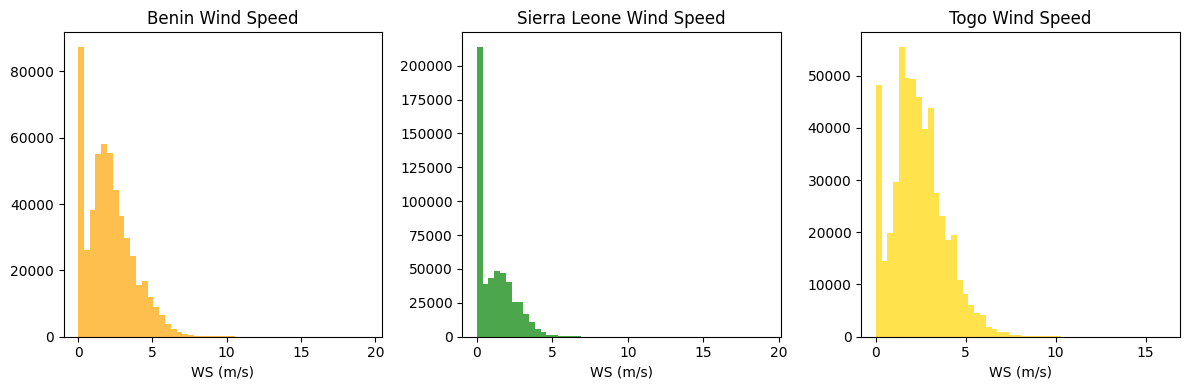

✅ Wind speed analysis completed!


In [22]:
print("💨 WIND SPEED ANALYSIS")
print("=" * 50)

# Wind speed distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(benin['WS'].dropna(), bins=50, alpha=0.7, color='orange')
plt.title('Benin Wind Speed')
plt.xlabel('WS (m/s)')

plt.subplot(1, 3, 2) 
plt.hist(sierra_leone['WS'].dropna(), bins=50, alpha=0.7, color='green')
plt.title('Sierra Leone Wind Speed')
plt.xlabel('WS (m/s)')

plt.subplot(1, 3, 3)
plt.hist(togo['WS'].dropna(), bins=50, alpha=0.7, color='gold')
plt.title('Togo Wind Speed') 
plt.xlabel('WS (m/s)')

plt.tight_layout()
plt.show()

print("✅ Wind speed analysis completed!")

In [23]:
print("📈 SOLAR POTENTIAL VARIABILITY ANALYSIS")
print("=" * 50)

# Compare consistency across countries
metrics = ['GHI', 'DNI', 'DHI']
comparison = {}

for metric in metrics:
    comparison[metric] = {
        'Benin': {'mean': benin[metric].mean(), 'std': benin[metric].std()},
        'Sierra Leone': {'mean': sierra_leone[metric].mean(), 'std': sierra_leone[metric].std()},
        'Togo': {'mean': togo[metric].mean(), 'std': togo[metric].std()}
    }

print("Consistency Analysis (Lower STD = More Predictable):")
for metric in metrics:
    print(f"\n{metric}:")
    for country in ['Benin', 'Sierra Leone', 'Togo']:
        mean_val = comparison[metric][country]['mean']
        std_val = comparison[metric][country]['std']
        cv = (std_val / mean_val) * 100  # Coefficient of variation
        print(f"  {country}: {mean_val:.1f} ± {std_val:.1f} (CV: {cv:.1f}%)")

📈 SOLAR POTENTIAL VARIABILITY ANALYSIS
Consistency Analysis (Lower STD = More Predictable):

GHI:
  Benin: 242.0 ± 330.1 (CV: 136.4%)
  Sierra Leone: 204.4 ± 296.8 (CV: 145.2%)
  Togo: 231.7 ± 321.7 (CV: 138.8%)

DNI:
  Benin: 167.4 ± 261.5 (CV: 156.2%)
  Sierra Leone: 116.5 ± 218.6 (CV: 187.6%)
  Togo: 151.3 ± 251.0 (CV: 165.9%)

DHI:
  Benin: 117.0 ± 157.5 (CV: 134.6%)
  Sierra Leone: 116.3 ± 157.0 (CV: 135.0%)
  Togo: 116.4 ± 156.5 (CV: 134.4%)


In [24]:
print("📊 STATISTICAL RESULTS SUMMARY")
print("=" * 50)

# Create a clean results table
results_data = {
    'Country': ['Benin', 'Togo', 'Sierra Leone'],
    'Mean GHI (W/m²)': [f"{benin_ghi:.1f}", f"{togo_ghi:.1f}", f"{sierra_ghi:.1f}"],
    'Median GHI (W/m²)': [f"{benin['GHI'].median():.1f}", f"{togo['GHI'].median():.1f}", f"{sierra_leone['GHI'].median():.1f}"],
    'Std Dev': [f"{benin['GHI'].std():.1f}", f"{togo['GHI'].std():.1f}", f"{sierra_leone['GHI'].std():.1f}"],
    'ANOVA Result': ['Best', 'Good', 'Lower']
}

results_df = pd.DataFrame(results_data)
print(results_df)

print(f"\n📈 Statistical Test:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("✅ Statistically Significant (p < 0.05)" if p_value < 0.05 else "❌ Not Significant")

📊 STATISTICAL RESULTS SUMMARY
        Country Mean GHI (W/m²) Median GHI (W/m²) Std Dev ANOVA Result
0         Benin           242.0               1.8   330.1         Best
1          Togo           231.7               2.1   321.7         Good
2  Sierra Leone           204.4               0.3   296.8        Lower

📈 Statistical Test:
F-statistic: 1977.0703
P-value: 0.0000
✅ Statistically Significant (p < 0.05)


In [25]:
print("📋 OFFICIAL SUMMARY TABLE - MEAN/MEDIAN/STD DEV")
print("=" * 50)

# Create the required official summary table
summary_data = []
for country_name, df in [('Benin', benin), ('Togo', togo), ('Sierra Leone', sierra_leone)]:
    for metric in ['GHI', 'DNI', 'DHI']:
        summary_data.append({
            'Country': country_name,
            'Metric': metric,
            'Mean': f"{df[metric].mean():.1f}",
            'Median': f"{df[metric].median():.1f}", 
            'Std Dev': f"{df[metric].std():.1f}"
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df)

📋 OFFICIAL SUMMARY TABLE - MEAN/MEDIAN/STD DEV
        Country Metric   Mean Median Std Dev
0         Benin    GHI  242.0    1.8   330.1
1         Benin    DNI  167.4    0.0   261.5
2         Benin    DHI  117.0    1.6   157.5
3          Togo    GHI  231.7    2.1   321.7
4          Togo    DNI  151.3    0.0   251.0
5          Togo    DHI  116.4    2.5   156.5
6  Sierra Leone    GHI  204.4    0.3   296.8
7  Sierra Leone    DNI  116.5    0.0   218.6
8  Sierra Leone    DHI  116.3    0.0   157.0


In [26]:
# EXPORT CLEANED DATA FILES
print("🚀 Exporting cleaned data files...")

# Export Benin cleaned data
benin.to_csv('../data/benin_clean.csv', index=False)
print("✅ benin_clean.csv exported")

# Export Togo cleaned data  
togo.to_csv('../data/togo_clean.csv', index=False)
print("✅ togo_clean.csv exported")

# Export Sierra Leone cleaned data
sierra_leone.to_csv('../data/sierra_leone_clean.csv', index=False)
print("✅ sierra_leone_clean.csv exported")

print("🎉 All cleaned data exported successfully!")

🚀 Exporting cleaned data files...
✅ benin_clean.csv exported
✅ togo_clean.csv exported
✅ sierra_leone_clean.csv exported
🎉 All cleaned data exported successfully!
